In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
%config Completer.use_jedi = False

# Predict the invariant mass of two electrons

Context

This dataset contains 100k dielectron events in the invariant mass range 2-110 GeV for use in outreach and education. These data were selected for use in education and outreach and contain a subset of the total event information. The selection criteria may be different from that used in CMS physics results.

Content

1) Run: The run number of the event.<br>
2) Event: The event number.<br>
3, 11) E1, E2: The total energy of the electron (GeV) for electrons 1 and 2.<br>
4, 5, 6, 12, 13, 14) px1,py1,pz1,px2,py2,pz2: The components of the momemtum of the electron 1 and 2 (GeV).<br>
7, 15) pt1, pt2: The transverse momentum of the electron 1 and 2 (GeV).<br>
8, 16) eta1, eta2: The pseudorapidity of the electron 1 and 2.<br>
9, 17) phi1, phi2: The phi angle of the electron 1 and 2 (rad).<br>
10, 18) Q1, Q2: The charge of the electron 1 and 2.<br>
19) M: The invariant mass of two electrons (GeV).<br>

In [2]:
#Reading Dataset
df = pd.read_csv('dielectron.csv')
print(df.head())

      Run      Event        E1      px1         py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   
3  147115  366952149  65.39590   7.51214  11.887100  63.86620  14.06190   
4  147115  366523212  61.45040   2.95284 -14.622700 -59.61210  14.91790   

      eta1     phi1  Q1       E2        px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.032340 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.713500  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.472800  2.25895 -15.5888   2.69667   
3  2.21838  1.00721   1  25.1273   4.087860  2.59641  24.6563   4.84272   
4 -2.09375 -1.37154  -1  13.8871  -0.277757 -2.42560 -13.6708   2.44145   

       eta2      phi2  Q2         M  
0 -2.344030 -2.072810  -1   8.94841  
1  0.808077  2.734920 

In [3]:
print(df.describe())

                 Run         Event             E1           px1   \
count  100000.000000  1.000000e+05  100000.000000  100000.000000   
mean   147935.327230  4.957212e+08      36.436466       0.135897   
std       920.306064  4.037703e+08      41.216203      13.404976   
min    146511.000000  6.414000e+03       0.377928    -250.587000   
25%    147114.000000  2.023970e+08       8.458595      -5.233675   
50%    147929.000000  3.902759e+08      21.717000       0.141339   
75%    149011.000000  6.338891e+08      50.003350       5.714560   
max    149182.000000  1.791247e+09     850.602000     134.539000   

                 py1            pz1            pt1           eta1  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.182291      -1.508037      14.412167      -0.064095   
std        13.470281      51.603652      12.388740       1.462137   
min      -126.079000    -840.987000       0.219629      -4.165380   
25%        -5.276248     -15.859825       

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Run     100000 non-null  int64  
 1   Event   100000 non-null  int64  
 2   E1      100000 non-null  float64
 3   px1     100000 non-null  float64
 4   py1     100000 non-null  float64
 5   pz1     100000 non-null  float64
 6   pt1     100000 non-null  float64
 7   eta1    100000 non-null  float64
 8   phi1    100000 non-null  float64
 9   Q1      100000 non-null  int64  
 10  E2      100000 non-null  float64
 11  px2     100000 non-null  float64
 12  py2     100000 non-null  float64
 13  pz2     100000 non-null  float64
 14  pt2     100000 non-null  float64
 15  eta2    100000 non-null  float64
 16  phi2    100000 non-null  float64
 17  Q2      100000 non-null  int64  
 18  M       99915 non-null   float64
dtypes: float64(15), int64(4)
memory usage: 14.5 MB
None


In [5]:
#Looking for nulls
print(df.isnull().sum())

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64


In [6]:
#Drop irrelevant information
df = df.drop(['Run','Event'],axis=1)

In [7]:
print(df.head())

         E1      px1         py1       pz1       pt1     eta1     phi1  Q1  \
0  58.71410  -7.31132  10.531000 -57.29740  12.82020 -2.20267  2.17766   1   
1   6.61188  -4.15213  -0.579855  -5.11278   4.19242 -1.02842 -3.00284  -1   
2  25.54190 -11.48090   2.041680  22.72460  11.66100  1.42048  2.96560   1   
3  65.39590   7.51214  11.887100  63.86620  14.06190  2.21838  1.00721   1   
4  61.45040   2.95284 -14.622700 -59.61210  14.91790 -2.09375 -1.37154  -1   

        E2        px2      py2      pz2       pt2      eta2      phi2  Q2  \
0  11.2836  -1.032340 -1.88066 -11.0778   2.14537 -2.344030 -2.072810  -1   
1  17.1492 -11.713500  5.04474  11.4647  12.75360  0.808077  2.734920   1   
2  15.8203  -1.472800  2.25895 -15.5888   2.69667 -2.455080  2.148570   1   
3  25.1273   4.087860  2.59641  24.6563   4.84272  2.330210  0.565865  -1   
4  13.8871  -0.277757 -2.42560 -13.6708   2.44145 -2.423700 -1.684810  -1   

          M  
0   8.94841  
1  15.89300  
2  38.38770  
3   3.72862 

In [8]:
#distribution of target column
fig = px.histogram(df, x='M')
fig.show()

In [9]:
#distribution of Energy of E1 column
fig = px.histogram(df, x='E1')
fig.show()

In [10]:
#Correlation with target variable
print(df.corr()['M'])

E1      0.285231
px1     0.006112
py1     0.007538
pz1     0.011526
pt1     0.437140
eta1    0.017102
phi1    0.001833
Q1      0.005624
E2      0.324660
px2    -0.004419
py2    -0.011725
pz2     0.015702
pt2     0.437158
eta2    0.018772
phi2   -0.004145
Q2     -0.000444
M       1.000000
Name: M, dtype: float64


In [11]:
#Drop Nulls
df= df.dropna()
print(df.isnull().sum())

E1      0
px1     0
py1     0
pz1     0
pt1     0
eta1    0
phi1    0
Q1      0
E2      0
px2     0
py2     0
pz2     0
pt2     0
eta2    0
phi2    0
Q2      0
M       0
dtype: int64


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99915 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   E1      99915 non-null  float64
 1   px1     99915 non-null  float64
 2   py1     99915 non-null  float64
 3   pz1     99915 non-null  float64
 4   pt1     99915 non-null  float64
 5   eta1    99915 non-null  float64
 6   phi1    99915 non-null  float64
 7   Q1      99915 non-null  int64  
 8   E2      99915 non-null  float64
 9   px2     99915 non-null  float64
 10  py2     99915 non-null  float64
 11  pz2     99915 non-null  float64
 12  pt2     99915 non-null  float64
 13  eta2    99915 non-null  float64
 14  phi2    99915 non-null  float64
 15  Q2      99915 non-null  int64  
 16  M       99915 non-null  float64
dtypes: float64(15), int64(2)
memory usage: 13.7 MB
None


In [13]:
print(df.shape)

(99915, 17)


# Data Preprocessing

In [14]:
X = df.drop('M', axis=1)
y = df[['M']]

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_scaled = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

print(X_scaled.head())

         E1      px1        py1       pz1       pt1      eta1      phi1  \
0  0.539816 -0.555376  0.767948 -1.080643 -0.128963 -1.462122  1.197923   
1 -0.724030 -0.319778 -0.056630 -0.069805 -0.825248 -0.659281 -1.680937   
2 -0.264843 -0.866324  0.137924  0.469417 -0.222513  1.015044  1.635789   
3  0.701897  0.550089  0.868589  1.266348 -0.028754  1.560573  0.547491   
4  0.606191  0.210077 -1.098802 -1.125480  0.040328 -1.387652 -0.774406   

        Q1        E2       px2       py2       pz2       pt2      eta2  \
0  1.00551 -0.700254 -0.078361 -0.152343 -0.154357 -0.935441 -1.306268   
1 -0.99452 -0.574818 -0.891835  0.373434  0.212457 -0.084323  0.506693   
2  1.00551 -0.603236 -0.111906  0.161937 -0.227761 -0.891209 -1.370139   
3  1.00551 -0.404205  0.311592  0.187557  0.427112 -0.719028  1.382160   
4 -0.99452 -0.644578 -0.020892 -0.193715 -0.196551 -0.911686 -1.352091   

       phi2        Q2  
0 -1.152781 -0.995775  
1  1.493217  1.004243  
2  1.170511  1.004243  
3  0.299

# Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,train_size=0.7, random_state=42)


# Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()

In [20]:
reg.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = reg.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.399291917829911
Root Mean Squared Error: 19.58136313955994


# Keras

In [45]:
#Regression
# Import necessary modules
import tensorflow.keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Specify the model
n_cols = X_train.shape[1]
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train,y_train, epochs=50)

Epoch 1/50
2186/2186 [==============================] - 1s 493us/step - loss: 350.2347
Epoch 2/50
2186/2186 [==============================] - 1s 491us/step - loss: 30.1885
Epoch 3/50
2186/2186 [==============================] - 1s 508us/step - loss: 20.0927
Epoch 4/50
2186/2186 [==============================] - 1s 477us/step - loss: 15.0301
Epoch 5/50
2186/2186 [==============================] - 1s 494us/step - loss: 11.8817
Epoch 6/50
2186/2186 [==============================] - 1s 495us/step - loss: 9.6512
Epoch 7/50
2186/2186 [==============================] - 1s 479us/step - loss: 7.9075
Epoch 8/50
2186/2186 [==============================] - 1s 491us/step - loss: 7.3190
Epoch 9/50
2186/2186 [==============================] - 1s 502us/step - loss: 6.3655
Epoch 10/50
2186/2186 [==============================] - 1s 500us/step - loss: 5.7954
Epoch 11/50
2186/2186 [==============================] - 1s 516us/step - loss: 5.0172
Epoch 12/50
2186/2186 [==============================] - 

In [46]:
y_pred = model.predict(X_test)

In [47]:
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.399291917829911
Root Mean Squared Error: 1.2604951245183804


In [35]:
import shap
from keras.preprocessing import sequence
# load JS visualization code to notebook
shap.initjs()

print(tensorflow.keras.__version__)

2.4.0


In [ ]:
print(x_train[:100])

# XGBOOST

In [37]:
import xgboost as xgb

In [38]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 12.786629


In [39]:
for col,score in zip(X_train.columns,xg_reg.feature_importances_):
    print(col,score)

E1 0.050881892
px1  0.0021092882
py1 0.022601115
pz1 0.12450665
pt1 0.13200168
eta1 0.04929416
phi1 0.06749207
Q1 0.0
E2 0.065495
px2 0.0006274053
py2 0.029920174
pz2 0.14798497
pt2 0.1298215
eta2 0.17103145
phi2 0.006232672
Q2 0.0


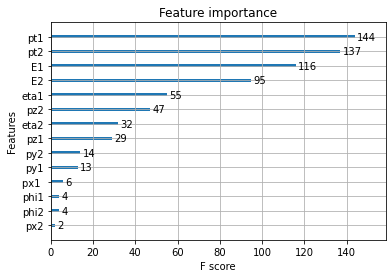

In [40]:
from matplotlib import pyplot
from xgboost import plot_importance
# plot feature importance
plot_importance(xg_reg)
pyplot.show()

In [41]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid: gbm_param_grid
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.7, 0.9],
    'n_estimators': [50,80,100],
    'max_depth': [2, 5,10]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(estimator=gbm, param_grid=gbm_param_grid, scoring='neg_mean_squared_error', cv=4, verbose=0)


# Fit grid_mse to the data
grid_mse.fit(X_train,y_train)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

[12:10:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:10:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[12:13:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[12:14:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [42]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100,
                          colsample_bytree=0.7,max_depth=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 3.293052


In [43]:
for col,score in zip(X_train.columns,xg_reg.feature_importances_):
    print(col,score)

E1 0.0450432
px1  0.0116509935
py1 0.029718127
pz1 0.117808454
pt1 0.15998615
eta1 0.081155874
phi1 0.010910616
Q1 0.0019596505
E2 0.07459987
px2 0.016919978
py2 0.01709131
pz2 0.11859282
pt2 0.214427
eta2 0.08906613
phi2 0.009889307
Q2 0.0011805147


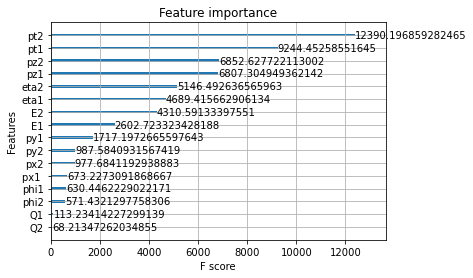

In [44]:

plot_importance(xg_reg, importance_type='gain')
pyplot.show()